# Prediction Using Supervise Machine LearningTechnique
## AUTHOR : Aman Agrawal
## PROBLEM STATEMENT

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# filtering out the warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing the required libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Reading The Data For Further Analysis


In [3]:
# Reading data from remote link
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data import successful")


Data import successful


# Exploratory Data Analysis

In [4]:
# head of the data
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#Checking the data dimensions
df.shape

(25, 2)

In [6]:
# Viewing the columns of the data
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# Checking the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# Checking for missing values if any
df.isnull().sum().sort_values(ascending=False)

Hours     0
Scores    0
dtype: int64

In [9]:
# Summary of all numerical data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


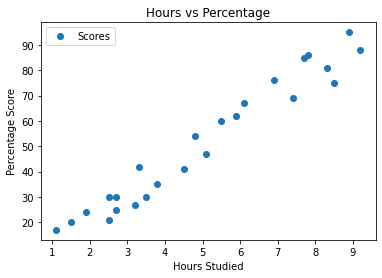

In [10]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


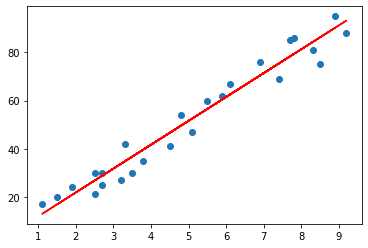

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

In [14]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


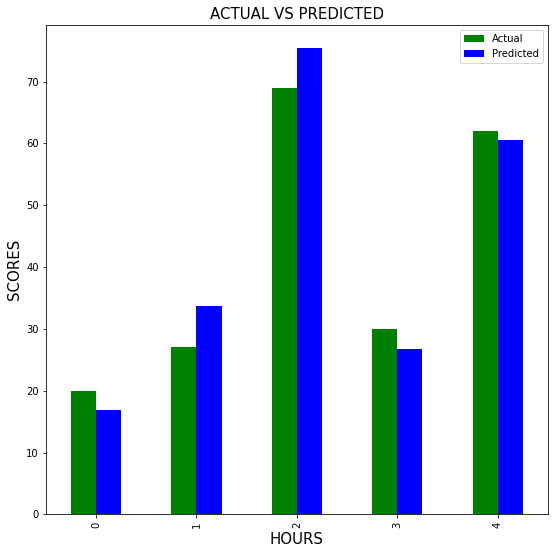

In [17]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot.bar(color=['green','blue'],figsize=(9,9))
plt.xlabel("HOURS",fontdict={'color':'black','fontsize':15})
plt.ylabel("SCORES",fontdict={'color':'black','fontsize':15})
plt.title("ACTUAL VS PREDICTED",fontdict={'color':'black','fontsize':15})
plt.show()

In [18]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


# MODEL EVALUATION
## Mean Absolute Error(MAE): MAE measures the differences between prediction and actual observation.

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 


Mean Absolute Error: 4.183859899002975


## MSE simply refers to the mean of the squared difference between the predicted value and the observed value.

In [20]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


Mean Squared Error: 21.598769307217406


## R-squared is measure of how close the data are to the fitted regression line.

In [21]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.647447612100367


In [22]:
print('R-2:', metrics.r2_score(y_test, y_pred))

R-2: 0.9454906892105355


# CONCLUSION



### 1.We have successfully created a Simple linear Regression model to predict score of the student given number of hours one studies.

### 2.By the MAE and MSE , we are not getting much difference in actual or predicted value , means error is less.


### 3.The Score of R-Square 0.94 quite close to 1.